Dataset loaded successfully!

Column Names:
Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')
Random Forest Accuracy: 0.99


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00        10
          BenignTraffic       0.87      0.99      0.92      4823
       BrowserHijacking       0.67      0.07      0.13        27
       CommandInjection       1.00      0.04      0.08        23
 DDoS-ACK_Fragmentation       1.00      0.99      0.99      1226
        DDoS-HTTP_Flood       0.98      0.93      0.95       111
        DDoS-ICMP_Flood       1.00      1.00      1.00     32088
DDoS-ICMP_Fragmentation       0.99      1.00      0.99      2046
      DDoS-PSHACK_Flood       1.00      1.00      1.00     18557
       DDoS-RSTFINFlood       1.00      1.00      1.00     17887
         DDoS-SYN_Flood       1.00      1.00      1.00     18542
         DDoS-SlowLoris       0.72      0.98      0.83        96
DDoS-SynonymousIP_Flood       1.00      1.00      1.00     16170
         DDoS-TCP_Flood       1.00      1.00      1.00     20394
         DDoS-UDP_Flood 

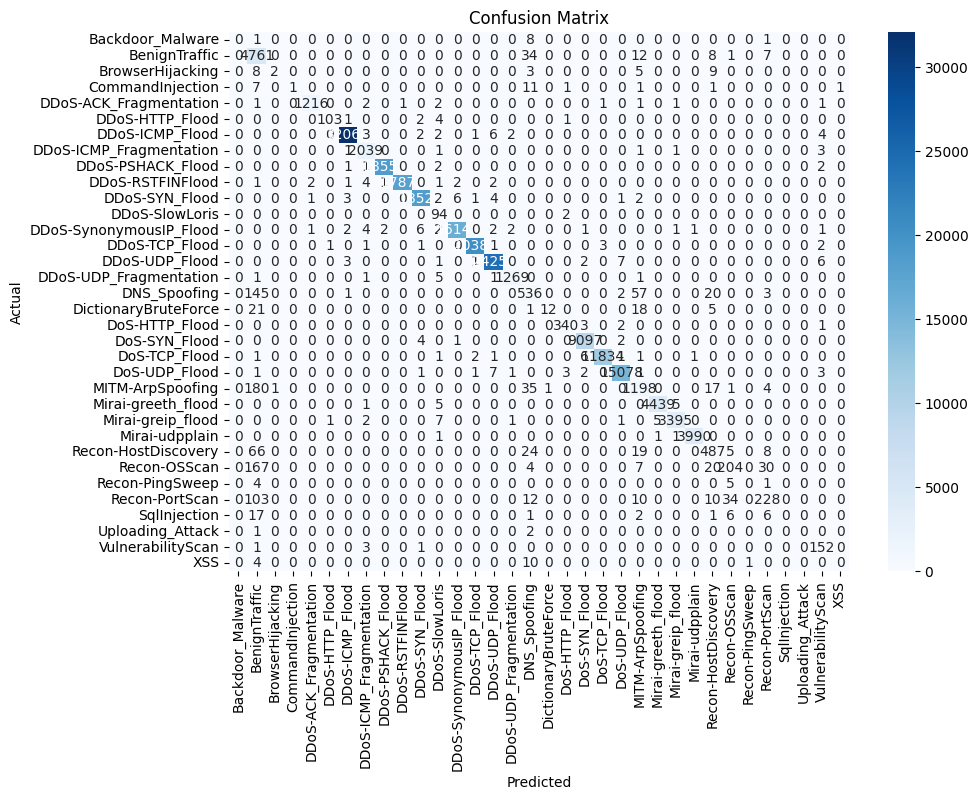

Random Forest Model saved as 'rf_intrusion_detection_model.pkl'


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset
file_path = '/kaggle/input/iotintrusion/IoT_Intrusion.csv'  # Correct the file path

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the file path.")
    raise

# Handle missing values, if any
df.dropna(inplace=True)

# Check the column names
print("\nColumn Names:")
print(df.columns)

# Split the data into features and target
target_column = 'label'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model to a file
joblib.dump(rf_model, 'rf_intrusion_detection_model.pkl')
print("Random Forest Model saved as 'rf_intrusion_detection_model.pkl'")


In [12]:
import pandas as pd

# Creating a small dataset with the expected feature names
data = {
    'flow_duration': [1, 2, 3, 4, 5],
    'Header_Length': [10, 20, 30, 40, 50],
    'Protocol Type': [1, 2, 1, 2, 1],
    'Duration': [100, 200, 300, 400, 500],
    'Rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'Srate': [0.05, 0.06, 0.07, 0.08, 0.09],
    'Drate': [0.01, 0.02, 0.03, 0.04, 0.05],
    'fin_flag_number': [0, 1, 0, 1, 0],
    'syn_flag_number': [1, 0, 1, 0, 1],
    'rst_flag_number': [0, 0, 1, 1, 0],
    'psh_flag_number': [1, 1, 0, 0, 1],
    'ack_flag_number': [0, 1, 0, 1, 0],
    'ece_flag_number': [0, 1, 0, 1, 0],
    'cwr_flag_number': [1, 0, 1, 0, 1],
    'ack_count': [10, 20, 30, 40, 50],
    'syn_count': [5, 6, 7, 8, 9],
    'fin_count': [0, 1, 0, 1, 0],
    'urg_count': [0, 0, 1, 1, 0],
    'rst_count': [1, 0, 1, 0, 1],
    'HTTP': [0, 1, 0, 1, 0],
    'HTTPS': [1, 0, 1, 0, 1],
    'DNS': [0, 1, 0, 1, 0],
    'Telnet': [1, 0, 1, 0, 1],
    'SMTP': [0, 1, 0, 1, 0],
    'SSH': [1, 0, 1, 0, 1],
    'IRC': [0, 1, 0, 1, 0],
    'TCP': [1, 0, 1, 0, 1],
    'UDP': [0, 1, 0, 1, 0],
    'DHCP': [1, 0, 1, 0, 1],
    'ARP': [0, 1, 0, 1, 0],
    'ICMP': [1, 0, 1, 0, 1],
    'IPv': [0, 1, 0, 1, 0],
    'LLC': [1, 0, 1, 0, 1],
    'Tot sum': [100, 200, 300, 400, 500],
    'Min': [10, 20, 30, 40, 50],
    'Max': [1000, 2000, 3000, 4000, 5000],
    'AVG': [100, 200, 300, 400, 500],
    'Std': [10, 20, 30, 40, 50],
    'Tot size': [1000, 2000, 3000, 4000, 5000],
    'IAT': [0.1, 0.2, 0.3, 0.4, 0.5],
    'Number': [1, 2, 3, 4, 5],
    'Magnitue': [10, 20, 30, 40, 50],
    'Radius': [100, 200, 300, 400, 500],
    'Covariance': [1, 2, 3, 4, 5],
    'Variance': [0.1, 0.2, 0.3, 0.4, 0.5],
    'Weight': [1, 2, 3, 4, 5]
}

# Convert to DataFrame
new_data = pd.DataFrame(data)

# Save to CSV (if needed)
new_data.to_csv('synthetic_iot_intrusion_corrected.csv', index=False)

# Debugging: Print the new data to verify
print("New data with correct feature names:")
print(new_data.head())


New data with correct feature names:
   flow_duration  Header_Length  Protocol Type  Duration  Rate  Srate  Drate  \
0              1             10              1       100   0.1   0.05   0.01   
1              2             20              2       200   0.2   0.06   0.02   
2              3             30              1       300   0.3   0.07   0.03   
3              4             40              2       400   0.4   0.08   0.04   
4              5             50              1       500   0.5   0.09   0.05   

   fin_flag_number  syn_flag_number  rst_flag_number  ...  AVG  Std  Tot size  \
0                0                1                0  ...  100   10      1000   
1                1                0                0  ...  200   20      2000   
2                0                1                1  ...  300   30      3000   
3                1                0                1  ...  400   40      4000   
4                0                1                0  ...  500   50      5000

In [14]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Trained Model
model_path = 'rf_intrusion_detection_model.pkl'

try:
    rf_model = joblib.load(model_path)
    print(f"Model loaded successfully from {model_path}")
except FileNotFoundError:
    print(f"Model file not found at {model_path}. Please check the file path.")
    raise

# Step 2: Load New Data
# Update this path to the correct path of your new data file
new_data_path = '/kaggle/input/new-test-data/synthetic_iot_intrusion_corrected.csv'

try:
    new_data = pd.read_csv(new_data_path)
    print(f"New data loaded successfully from {new_data_path}")
except FileNotFoundError:
    print(f"New data file not found at {new_data_path}. Please check the file path.")
    raise

# Step 3: Align Columns with Model
# Get feature names from the model
model_feature_names = rf_model.feature_names_in_

# Debugging: Print the model's expected feature names
print("Model's expected feature names:")
print(model_feature_names)

# Debugging: Print the new data columns
print("New data columns:")
print(new_data.columns)

# Ensure new data has the same columns in the same order
expected_columns = model_feature_names.tolist()  # Convert to list

# Check and reorder columns if all expected columns are present
if all(column in new_data.columns for column in expected_columns):
    new_data = new_data[expected_columns]
else:
    print("The new data does not contain all expected columns. Please check the new data.")
    raise ValueError("Column mismatch between new data and model.")

# Debugging: Print the new data to verify columns
print("New data with aligned columns:")
print(new_data.head())

# Step 4: Prepare New Data
def prepare_new_data(data):
    # Debugging: Print the first few rows of the data to verify
    print("New data before preprocessing:")
    print(data.head())
    
    # Example preprocessing: handle missing values
    data = data.dropna()
    
    # Debugging: Print the data shape after preprocessing
    print("New data shape after preprocessing:")
    print(data.shape)
    
    return data

# Debugging: Print the new data before preprocessing
print("New data before prediction:")
print(new_data)

# Prepare new data
prepared_data = prepare_new_data(new_data)

# Debugging: Print the prepared data
print("Prepared data:")
print(prepared_data)

# Step 5: Make Predictions
try:
    predictions = rf_model.predict(prepared_data)
    print("Predictions made successfully.")
except Exception as e:
    print(f"Error during prediction: {e}")
    raise

# Debugging: Print the predictions
print("Predictions:")
print(predictions)

# Optional: If you have the true labels for new data, evaluate the predictions
# Assuming you have true labels in `true_labels`
# true_labels = [actual_label]  # Replace with actual labels if available

# Step 6: Evaluate Predictions (if true labels are available)
# if 'true_labels' in locals():
#     accuracy = accuracy_score(true_labels, predictions)
#     print(f'Accuracy: {accuracy:.2f}')
#     print(classification_report(true_labels, predictions))
    
#     # Confusion Matrix
#     cm = confusion_matrix(true_labels, predictions, labels=rf_model.classes_)
#     plt.figure(figsize=(10, 7))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.show()


Model loaded successfully from rf_intrusion_detection_model.pkl
New data loaded successfully from /kaggle/input/new-test-data/synthetic_iot_intrusion_corrected.csv
Model's expected feature names:
['flow_duration' 'Header_Length' 'Protocol Type' 'Duration' 'Rate' 'Srate'
 'Drate' 'fin_flag_number' 'syn_flag_number' 'rst_flag_number'
 'psh_flag_number' 'ack_flag_number' 'ece_flag_number' 'cwr_flag_number'
 'ack_count' 'syn_count' 'fin_count' 'urg_count' 'rst_count' 'HTTP'
 'HTTPS' 'DNS' 'Telnet' 'SMTP' 'SSH' 'IRC' 'TCP' 'UDP' 'DHCP' 'ARP' 'ICMP'
 'IPv' 'LLC' 'Tot sum' 'Min' 'Max' 'AVG' 'Std' 'Tot size' 'IAT' 'Number'
 'Magnitue' 'Radius' 'Covariance' 'Variance' 'Weight']
New data columns:
Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_cou